In [1]:
## Notebook 2 - Practice with Scikit Learn - Daniel Sandoz


In [1]:
#import packages
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection  import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn import tree 
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

In [2]:
## A: Read in Churn Calls dataset


In [2]:
Churn = pd.read_csv('C:/Users/Modeling/Documents/Predictive Models/PM Data/Churn_Calls.csv')

In [ ]:
## B: Set Target Variable as 'Churn'

In [3]:
# designate target variable name
targetName = 'churn'
targetSeries = Churn[targetName]
#remove target from current location and insert in collum 0
del Churn[targetName]
Churn.insert(0, targetName, targetSeries)
#reprint dataframe and see target is in position 0
Churn.head(10)

,churn,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,no,AK,1,area_code_408,no,no,0,175.2,74,29.78,151.7,79,12.89,230.5,109,10.37,5.3,3,1.43,1
1,no,AK,36,area_code_408,no,yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0
2,yes,AK,36,area_code_415,yes,yes,19,171.9,96,29.22,198.4,111,16.86,321.7,76,14.48,10.5,1,2.84,1
3,no,AK,41,area_code_415,no,no,0,159.3,66,27.08,125.9,75,10.70,261.9,76,11.79,11.1,5,3.00,1
4,no,AK,42,area_code_415,no,no,0,171.0,129,29.07,183.9,96,15.63,130.2,90,5.86,4.6,6,1.24,0
5,no,AK,48,area_code_415,no,yes,37,211.7,115,35.99,159.9,84,13.59,144.1,80,6.48,12.2,1,3.29,1
6,no,AK,50,area_code_408,no,no,0,183.6,107,31.21,58.6,118,4.98,202.6,99,9.12,8.7,3,2.35,1
7,no,AK,51,area_code_510,yes,yes,12,135.8,60,23.09,200.6,134,17.05,192.4,98,8.66,12.3,7,3.32,2
8,no,AK,52,area_code_408,no,no,0,217.0,104,36.89,152.3,83,12.95,134.3,109,6.04,11.8,4,3.19,2
9,no,AK,52,area_code_415,no,yes,24,170.9,71,29.05,201.4,80,17.12,159.0,124,7.15,4.1,5,1.11,2


In [ ]:
## C: EDA


In [4]:
np.sum(Churn.isnull())

churn                            0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

In [5]:
Churn.dtypes

churn                             object
state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
dtype: object

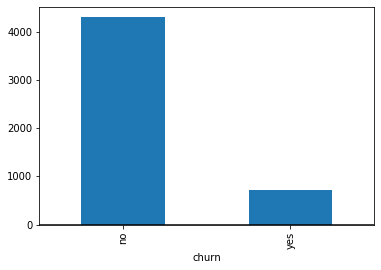

In [6]:
# With a binomial target variable, we can compare the Yes and Nos 
groupby = Churn.groupby(targetName)
targetEDA=groupby[targetName].aggregate(len)
plt.figure()
targetEDA.plot(kind='bar', grid=False)
plt.axhline(0, color='k')

In [7]:
# To understand the dataset from a big picture scale, 
# we can use the describe command
Churn.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [17]:
# Here we can compare the day, evening and international 
# minutes, calls, and charges

In [ ]:
## D: Transform the data 


In [8]:
# Turning target (churn) into numeric
# Allows for scikit processes to occur 
from sklearn import preprocessing
le_dep = preprocessing.LabelEncoder()
#to convert into numbers
Churn['churn'] = le_dep.fit_transform(Churn['churn'])

In [9]:
# Creating dummies
for col in Churn.columns[1:]:
	attName = col
	dType = Churn[col].dtype
	missing = pd.isnull(Churn[col]).any()
	uniqueCount = len(Churn[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		Churn = pd.concat([Churn, pd.get_dummies(Churn[col], prefix=col)], axis=1)
		del Churn[attName]

In [10]:
#view transformation
Churn.shape

(5000, 74)

In [11]:
Churn.head(10)

,churn,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,...,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,0,1,0,175.2,74,29.78,151.7,79,12.89,230.5,...,0,0,0,1,0,0,1,0,1,0
1,0,36,30,146.3,128,24.87,162.5,80,13.81,129.3,...,0,0,0,1,0,0,1,0,0,1
2,1,36,19,171.9,96,29.22,198.4,111,16.86,321.7,...,0,0,0,0,1,0,0,1,0,1
3,0,41,0,159.3,66,27.08,125.9,75,10.70,261.9,...,0,0,0,0,1,0,1,0,1,0
4,0,42,0,171.0,129,29.07,183.9,96,15.63,130.2,...,0,0,0,0,1,0,1,0,1,0
5,0,48,37,211.7,115,35.99,159.9,84,13.59,144.1,...,0,0,0,0,1,0,1,0,0,1
6,0,50,0,183.6,107,31.21,58.6,118,4.98,202.6,...,0,0,0,1,0,0,1,0,1,0
7,0,51,12,135.8,60,23.09,200.6,134,17.05,192.4,...,0,0,0,0,0,1,0,1,0,1
8,0,52,0,217.0,104,36.89,152.3,83,12.95,134.3,...,0,0,0,1,0,0,1,0,1,0
9,0,52,24,170.9,71,29.05,201.4,80,17.12,159.0,...,0,0,0,0,1,0,1,0,0,1


In [22]:
## E: Create a train and test sample 60/40


In [12]:
features_train, features_test, target_train, target_test = train_test_split(
    Churn.iloc[:,1:].values, Churn.iloc[:,0].values, test_size=0.4, random_state=0)

In [13]:
# confirm split
print(features_test.shape)
print(features_train.shape)
print(target_test.shape)
print(target_train.shape)

(2000, 73)
(3000, 73)
(2000,)
(3000,)


In [ ]:
## F: Perform a decision tree


In [14]:
#create decision tree 
decision_tree = tree.DecisionTreeClassifier()
print(decision_tree)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [15]:
#altering parameters to decision tree 
decision_tree = tree.DecisionTreeClassifier(max_depth=30, max_features = 10)
#decision_tree = tree.DecisionTreeClassifier(max_leaf_nodes = 1, max_features = 5)
#fitting the decision tree
decision_tree = decision_tree.fit(features_train, target_train)
# predict using futures
decision_tree_predict = decision_tree.predict(features_test)

In [16]:
print('Decision Tree Accuracy Score: ', accuracy_score(target_test, decision_tree_predict))
print(classification_report(target_test, decision_tree_predict))
print(confusion_matrix(target_test, decision_tree_predict))

Decision Tree Accuracy Score:  0.8915
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1708
           1       0.63      0.63      0.63       292

    accuracy                           0.89      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.89      0.89      0.89      2000

[[1598  110]
 [ 107  185]]


In [ ]:
## G: Cross Validate Decision Tree


In [17]:
# Validation with CV=10
scores = cross_val_score(decision_tree, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean() 

Cross Validation Score for each K [0.89       0.90666667 0.85333333 0.92666667 0.87666667 0.89333333
 0.86666667 0.88       0.87666667 0.90666667]


0.8876666666666667

In [ ]:
## Interpretation

In [ ]:
# The decision tree model has a 89% accuracy and did well in 
# classifying "No"s. The false postivies and false negatives
# are very low when compared to the true positives and true negatives.
# The cross validation score is ~ 89% as well. This tells us that
# the model performs well when compared to out-of-set data

In [ ]:
## H: Perform KNN=3


In [18]:
from sklearn.neighbors import KNeighborsClassifier
# knn model
knn = KNeighborsClassifier(n_neighbors = 3)
knn = knn.fit(features_train, target_train)

# predicting using test set
knn_predict = knn.predict(features_test)

In [19]:
# classification and confusion matrix 
print("KNN accuracy score: ",accuracy_score(target_test,knn_predict))
print(classification_report(target_test, knn_predict))
print(confusion_matrix(target_test, knn_predict))

KNN accuracy score:  0.868
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1708
           1       0.59      0.31      0.41       292

    accuracy                           0.87      2000
   macro avg       0.74      0.64      0.67      2000
weighted avg       0.85      0.87      0.85      2000

[[1645   63]
 [ 201   91]]


In [ ]:
## I: Cross Validate KNN


In [20]:
knn_cross_validate_scores = cross_val_score(knn, features_train, target_train, cv=10)
print('CV Score for each K', knn_cross_validate_scores)
print('CV mean score: ', knn_cross_validate_scores.mean())

CV Score for each K [0.87       0.86333333 0.87666667 0.89666667 0.86       0.87
 0.88666667 0.86333333 0.88       0.88666667]
CV mean score:  0.8753333333333334


In [ ]:
## Interpretation

In [ ]:
# The KNN model returned an accuracy of 86.8%, not far behind Random Forest
# KNN also returned more true positives, but also more false positives.
# KNN also compares closely to Decision Trees in its cross validation score
# When deciding between the two models, I think it is important to understand
# the business question here in terms of morality. When compairing churned calls from a call center,
# there is not a high increase in asset liability for deploying a model that
# is heavy on "yes" classifications for telephone calls. However if you are working
# in a healthcare setting and predicting diseases etc., management should err 
# on the side of caution. In this setting, I would argue that the increase in true positives
# outweigh the increase in false positives and choose KNN over Decision Tree here.

In [ ]:
## J: Random Forest


In [21]:
# Train RF 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 500, n_jobs=-1,oob_score=True)
rf = rf.fit(features_train, target_train)

# testing the RF model
target_predicted_rf = rf.predict(features_test)
print("Random Forest accuracy score:", accuracy_score(target_test, target_predicted_rf))
target_names = ["Churn = no", "Churn = yes"]
print(classification_report(target_test, target_predicted_rf, target_names=target_names))
print(confusion_matrix(target_test, target_predicted_rf))

Random Forest accuracy score: 0.954
              precision    recall  f1-score   support

  Churn = no       0.95      0.99      0.97      1708
 Churn = yes       0.96      0.72      0.82       292

    accuracy                           0.95      2000
   macro avg       0.96      0.86      0.90      2000
weighted avg       0.95      0.95      0.95      2000

[[1699    9]
 [  83  209]]


In [22]:
# cross validation
scores_rf = cross_val_score(rf, features_train, target_train, cv=10, n_jobs=-1)
print("Cross Validation Score for each K",scores_rf)
scores_rf.mean()

Cross Validation Score for each K [0.94666667 0.94666667 0.95       0.96333333 0.93333333 0.95
 0.94666667 0.94       0.94666667 0.95666667]


0.9480000000000001

In [ ]:
## Interpretation


In [ ]:
# The Random Forest model accuracy is the highest of the three at
# 95% and also has more true positives, and true negatives. Also 
# the cross validation score is the highest at ~ 95%

In [ ]:
## Conclusion 

In [ ]:
# When considering all three models, it is apparent that the best
# model is the Random Forest Model. It returned the lowest number
# of false postives and false negatives, and the highest number of
# true positives and true negatives. The KNN model beat out the 
# Decision Tree model when considering the use case, however the
# Random Forest model has a higher accuracy and predicted more 
# true postives than the other two models.